In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2012/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  1168
Number of Edges:  224744


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

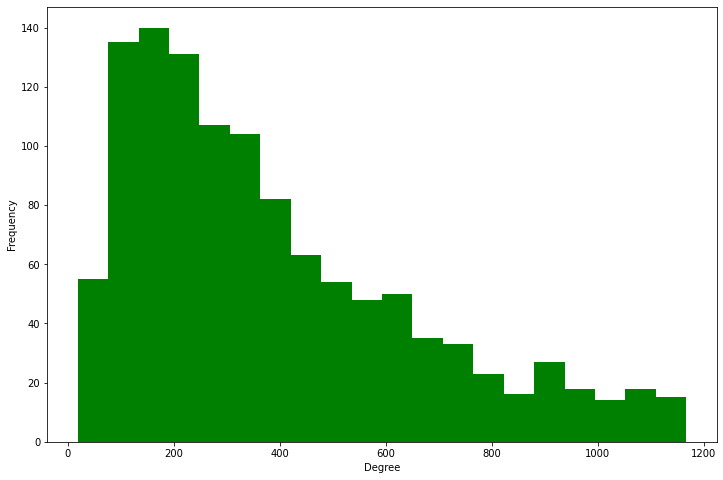

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

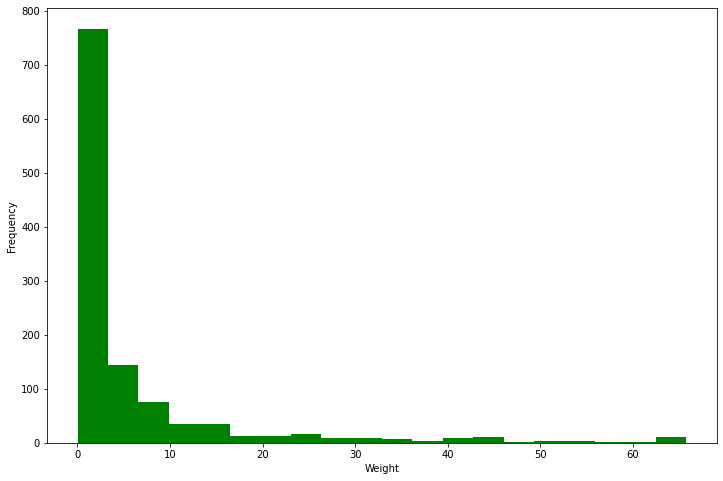

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

384.83561643835617
19
1167


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

5.922344687369643
0.011124121779859487
65.77517564402748


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'var': 1167, 'name': 1167, 'window': 1167, 'document': 1167, 'frames': 1166, 'opener': 1166, 'self': 1166, 'top': 1166, 'location': 1166, 'parent': 1166, 'length': 1163, 'null': 1160, 'init': 1152, 'push': 1128, 'src': 1120, 'true': 1109, 'Math': 1105, 'createElement': 1104, 'setTimeout': 1100, 'type': 1099, 'navigator': 1096, 'Date': 1088, 'body': 1086, 'id': 1085, 'join': 1081, 'undefined': 1081, 'height': 1075, 'width': 1072, 'false': 1071, 'style': 1071, 'addEventListener': 1061, 'string': 1060, 'getElementsByTagName': 1058, 'href': 1050, 'onload': 1044, 'prototype': 1042, 'getTime': 1040, 'arguments': 1034, 'call': 1032, 'appendChild': 1024, 'readyState': 1022, 'replace': 1021, 'parentNode': 1009, 'toString': 1000, 'documentElement': 1000, 'userAgent': 998, 'attachEvent': 995, 'getElementById': 991, 'left': 991, 'slice': 990, 'none': 988, 'target': 986, 'match': 984, 'complete': 984, 'object': 983, 'function': 976, 'load': 970, 'delete': 965, 'event': 955, 'apply': 954, 'removeCh

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 65.77517564402748, 'var': 65.76639344262233, 'window': 65.76639344262233, 'name': 65.71604215456613, 'location': 65.49707259953092, 'frames': 65.4467213114747, 'opener': 65.4467213114747, 'parent': 65.4467213114747, 'self': 65.44672131147469, 'top': 65.44672131147469, 'length': 62.84894613583095, 'src': 60.459601873535895, 'createElement': 58.07318501170917, 'null': 57.096018735362556, 'navigator': 55.61358313817291, 'init': 55.091334894613084, 'getElementsByTagName': 53.38407494145174, 'Date': 52.911007025760746, 'push': 50.70374707259914, 'join': 49.861826697891935, 'type': 49.76814988290363, 'appendChild': 46.56264637002321, 'parentNode': 45.926229508196556, 'width': 45.727166276346296, 'true': 45.61826697892238, 'height': 45.29918032786858, 'Math': 44.73653395784512, 'href': 43.745901639343955, 'addEventListener': 43.439110070257186, 'undefined': 43.432669789226914, 'attachEvent': 43.0503512880559, 'onload': 42.92857142857107, 'replace': 42.81615925058528, 'getTime': 4

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.824032393286109

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6702351187331994

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

8


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

229
138
232
163
34
77
224
71


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)
